In [13]:

# Simple  LSTM example using Python 

#     Generates a sine wave sequence.
#     Trains an LSTM to predict the next value.
#     Visualizes training and prediction results.



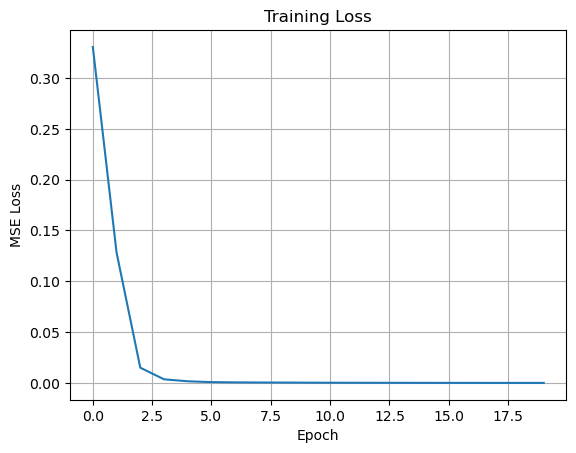

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 


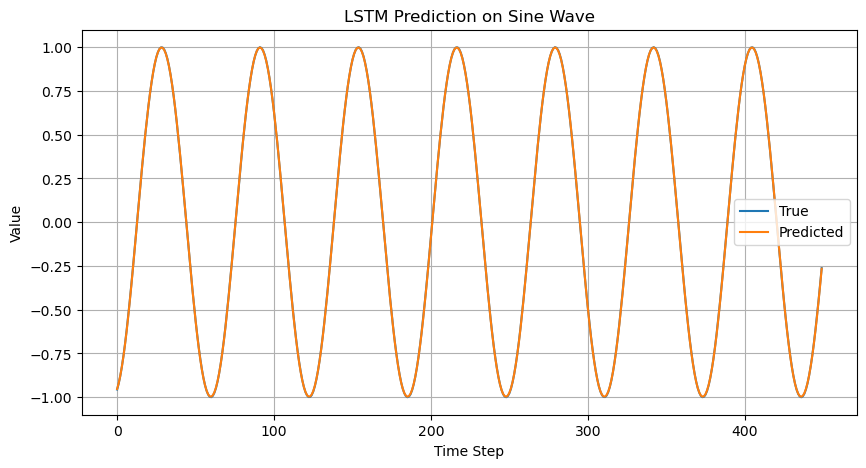

In [15]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 2: Generate synthetic sine wave data
def generate_sine_wave(seq_length=50, total_points=500):
    x = np.linspace(0, 50, total_points)
    y = np.sin(x)
    sequences = []
    targets = []
    for i in range(len(y) - seq_length):
        sequences.append(y[i:i+seq_length])
        targets.append(y[i+seq_length])
    return np.array(sequences), np.array(targets)

seq_len = 50
X, y = generate_sine_wave(seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM expects 3D input

# Step 3: Build the LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_len, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Step 4: Train the model
history = model.fit(X, y, epochs=20, verbose=0)

# Step 5: Visualize training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

# Step 6: Make predictions
y_pred = model.predict(X)

# Step 7: Plot actual vs predicted
# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y, label='True')
plt.plot(y_pred.flatten(), label='Predicted')
plt.title('LSTM Prediction on Sine Wave')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



In [16]:
# Print first 10 predicted vs actual values
print("Sample predictions:")
for i in range(10):
    print(f"True: {y[i]:.4f}  |  Predicted: {y_pred[i][0]:.4f}")


Sample predictions:
True: -0.9560  |  Predicted: -0.9531
True: -0.9219  |  Predicted: -0.9198
True: -0.8785  |  Predicted: -0.8774
True: -0.8263  |  Predicted: -0.8265
True: -0.7659  |  Predicted: -0.7673
True: -0.6977  |  Predicted: -0.7002
True: -0.6225  |  Predicted: -0.6260
True: -0.5411  |  Predicted: -0.5451
True: -0.4543  |  Predicted: -0.4584
True: -0.3629  |  Predicted: -0.3668
